# Part 01

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
K = len(np.unique(y_train)) # Return the unique elements of a tratining output set and take it length as Classes
Ntr = x_train.shape[0] # number of training examples
Nte = x_test.shape[0] # number of testing examples
Din = 3072 # By CIFAR10 data set with 32 x 32 x 3 color images

# Normalize pixel values: Image data preprocessing
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0) # axis=0: mean of a column; Mean of each pixel
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K) # This function returns a matrix of binary values (either ‘1’ or ‘0’). It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

#reshape/flatten the data
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (50000, 3072)
x_test: (10000, 3072)
y_train: (50000, 10)
y_test: (10000, 10)


In [17]:
batch_size = Ntr # for gradient descent optimization batch size is equal to number of training set
iterations = 300
# epochs
lr = 1.4e-2 # the learning rate alpha
lr_decay= 0.999
reg = 5e-6 #the regularization constant - lamda

In [19]:
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []

std=1e-5 # standard deviation of normal distributaion
w1 = std*np.random.randn(Din, K) # initialize the w matrix with random values
b1 = np.zeros(K)

for t in range(iterations):
    batch_indices = np.random.choice(Ntr, batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]

    #forward 
    y_pred = x.dot(w1) + b1
    y_pred_test = x_test.dot(w1) + b1
    
    loss = (1/batch_size)*(np.square(y - y_pred)).sum() + reg*(np.sum(w1*w1))
    loss_history.append(loss)
    
    # compute the accuracy as percentage
    training_acc = 100*(1 - (1/(batch_size*K))*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum())  
    testing_acc = 100*(1 - (1/(Nte*K))*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred_test,axis=1))).sum())
    train_acc_history.append(training_acc)
    val_acc_history.append(testing_acc)

    if t%10 == 0:
        print("iteration %d / %d| loss %f| training accuracy %f| testing accuracy %f" % (t, iterations, loss, training_acc, testing_acc))
    # Backward 
    dy_pred = (1./batch_size)*2.0*(y_pred-y) # partial derivative w.r.t y_predicted
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis=0)
    #updating learning parameters
    w1 -= lr*dw1 
    b1 -= lr*db1
    lr *= lr_decay
    
    lr_history.append(lr)

iteration 0 / 300| loss 0.999991| training accuracy 69.330400| testing accuracy 69.168000
iteration 10 / 300| loss 0.877050| training accuracy 75.388200| testing accuracy 75.632000
iteration 20 / 300| loss 0.842278| training accuracy 76.218800| testing accuracy 76.704000
iteration 30 / 300| loss 0.825244| training accuracy 76.718000| testing accuracy 77.004000
iteration 40 / 300| loss 0.811409| training accuracy 76.959400| testing accuracy 77.103000
iteration 50 / 300| loss 0.806968| training accuracy 76.868800| testing accuracy 77.242000
iteration 60 / 300| loss 0.799815| training accuracy 77.203400| testing accuracy 77.227000
iteration 70 / 300| loss 0.798626| training accuracy 77.360200| testing accuracy 77.274000
iteration 80 / 300| loss 0.795827| training accuracy 77.483400| testing accuracy 77.259000
iteration 90 / 300| loss 0.793994| training accuracy 77.402000| testing accuracy 77.433000
iteration 100 / 300| loss 0.793306| training accuracy 77.352800| testing accuracy 77.396000

In [25]:
print(w1)
print("--------------------")
print(w1[:,9])

[[-0.00012992 -0.00095117 -0.0001101  ...  0.0002031   0.00367851
  -0.00089039]
 [-0.00012757 -0.00187911  0.00057893 ...  0.00217778  0.00230199
   0.00337371]
 [ 0.00362242 -0.00223209 -0.00475248 ...  0.00622711  0.00383579
   0.00688195]
 ...
 [ 0.00044541 -0.00110525  0.00055008 ...  0.00524831 -0.00822576
   0.00655447]
 [-0.00160015 -0.00079057 -0.00021198 ...  0.00445084 -0.00133216
   0.00387107]
 [-0.00269291  0.00068543 -0.00104686 ... -0.00314752  0.00463678
   0.00296677]]
--------------------
[-0.00089039  0.00337371  0.00688195 ...  0.00655447  0.00387107
  0.00296677]


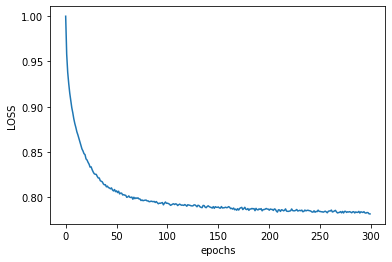

In [40]:
fig, axes = plt.subplots()
axes.plot(loss_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("LOSS")
plt.show()
fig.savefig('LOSS.png',transparent=True)

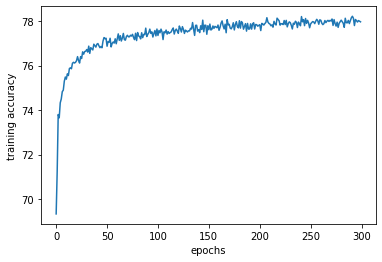

In [39]:
fig, axes = plt.subplots() 
axes.plot(train_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("training accuracy")
plt.show()
fig.savefig('training accuracy.png',transparent=True)

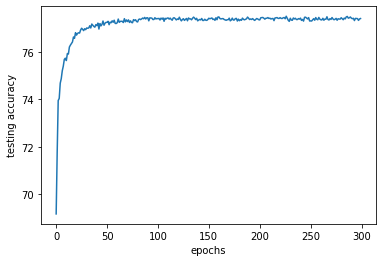

In [38]:
fig, axes = plt.subplots() 
axes.plot(val_acc_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("testing accuracy")
plt.show()
fig.savefig('testing accuracy.png',transparent=True)

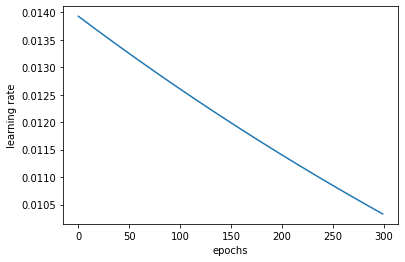

In [37]:
fig, axes = plt.subplots() 
axes.plot(lr_history)  
axes.set_xlabel("epochs")
axes.set_ylabel("learning rate")
plt.show()
fig.savefig('learning rate.png',transparent=True)

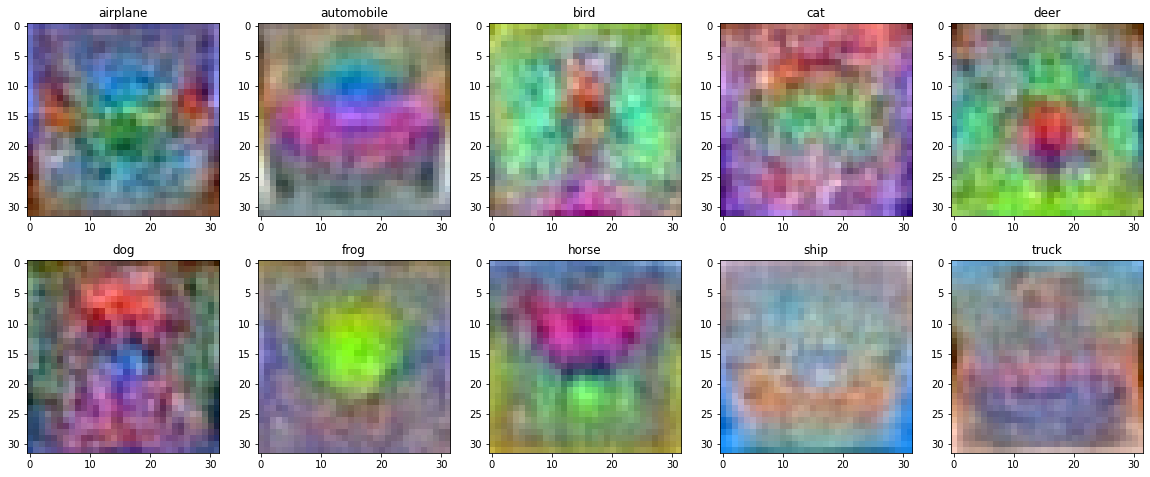

In [50]:
imgs_for_w1=[]
titles_of_imgs = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(w1.shape[1]):
    temp = np.reshape(w1[:,i]*255,(32,32,3))
    temp = cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    imgs_for_w1.append(temp)
fig,ax = plt.subplots(2,5,figsize=(20,8))
# show resultant image as a type of 2 x 5 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(imgs_for_w1[i*5+j], vmin=0, vmax=255)
        ax[i,j].set_title(titles_of_imgs[i*5+j])
plt.show()
fig.savefig('img_for_w1',transparent=True)